# Project Business Statistics: E-news Express


#### Stefhany Rodriguez 

## Define Problem Statement and Objectives

* E - news  is an online news portal, and its main objective is to continue acquiring new subscribers. However, to achieve this goal, it is necessary to observe user behavior. Recently, the executives of this portal have noticed a decline in monthly subscribers and attribute it to the current webpage design. Therefore, the aim is to analyze the current user behavior, use the existing data collection to identify patterns and common behaviors, and based on that, take the necessary measures.
* A/B testing is pertinent because it allows determining which version works better in terms of user engagement and conversion rates.
  
* The design team has created a new landing page that has a different layout from the previous one. Based on the collected data, as part of the data science team, I will explore the data through statistical analysis with a significance level of 5% to assess the effectiveness of this new landing page in acquiring new subscribers. The evaluation will include whether the time spent is greater on the new page compared to the old one, whether the conversion rate is higher for the new page, whether the conversion status depends on the preferred language, and whether the time spent is equal or greater for users with different preferred languages.

#### Data dictionary 

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [11]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
# import libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [13]:
#Reading the data from the folder of my posgraduate program module 2 business statistics 
df = pd.read_csv("/Users/stefhanyrodriguez/Documents/Business statistics/Project/abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [16]:
# Displaying the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [17]:
# Displaying the last 5 rows 
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [18]:
#shape returns a tuple with the number of rows and columns 
rows, columns = df.shape
print('The dataset has', rows, 'rows.')
print('The dataset has', columns, 'columns.')

The dataset has 100 rows.
The dataset has 6 columns.


In [19]:
#.describe() gives a summary statistical for a numerical column by default 
# include = 'all' to include numerical and categorical column 
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


* For categorical variables pandas calculates: count, unique, top and freq. 

* Seeing NaN values for categorical columns in the output of .describe() is expected and indicates that those specific statistics are not applicable to categorical data.nt value.


In [21]:
# Using .describe to have just numerical columns
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


* Count, mean, std, min, 25%, 50%, 75%, max are provided for numerical variables. 

In [23]:
#dtypes is used to see data types of each column 
data_types_column = df.dtypes
print(data_types_column)

user_id                     int64
group                      object
landing_page               object
time_spent_on_the_page    float64
converted                  object
language_preferred         object
dtype: object


* Here I can evidence the 3 different data types of the columns in the data frame. 
* User_id is integer type.
* Group, landing_page, converted and language_preferred are objects, used to represent string type. 
* Time_spent_on_the_page is float type. 

### Missing values 

In [26]:
#Checking for missing values 
missing_values = df.isnull().sum()
print(missing_values)
print('')
it_has_missing_values = df.isnull().sum().any()
print("Are there any missing values: true or false?", it_has_missing_values)

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

Are there any missing values: true or false? False


* No missing values found in the dataframe.

### Check for duplicates 

In [29]:
# Check if there's any duplicates 
duplicates= df.duplicated()
duplicates.sum()

0

* There's no duplicates in the dataframe. 

In [31]:
# check if there's any duplicated user id 
df['user_id'].duplicated().sum()

0

### Univariate Analysis

### Group 

In [34]:
df['group'].nunique()

2

* Usage of .nunique() to understand the diversity of the data. In this column I can evidence just two unique values for group. 

In [36]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

* Return the count of the unique values of the column group. There are 50 of control group and 50 of the treatment group. 

Text(0.5, 1.0, 'Group')

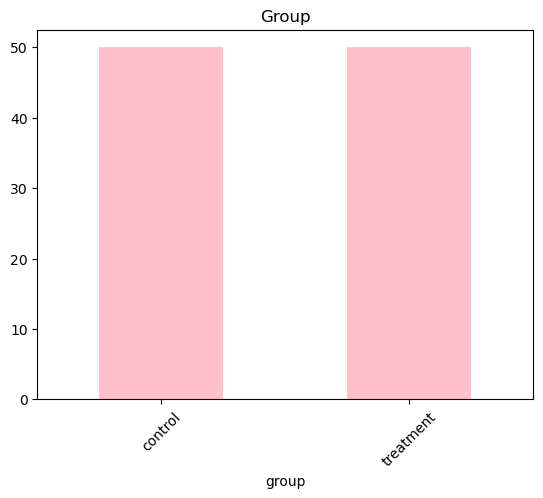

In [38]:
group = df['group'].value_counts()
group.plot(kind='bar', color='pink')
plt.xticks(rotation=45)
plt.title('Group')

### Landing page 

In [40]:
df['landing_page'].nunique()

2

+ Usage of .nunique() to understand the diversity of the data. In this column I can evidence just two unique values for landing_page.

In [42]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

* Return the count of the unique values of the column landing_page. There are 50 data of old landing page and 50 data of new landing page.

([0, 1], [Text(0, 0, 'old'), Text(1, 0, 'new')])

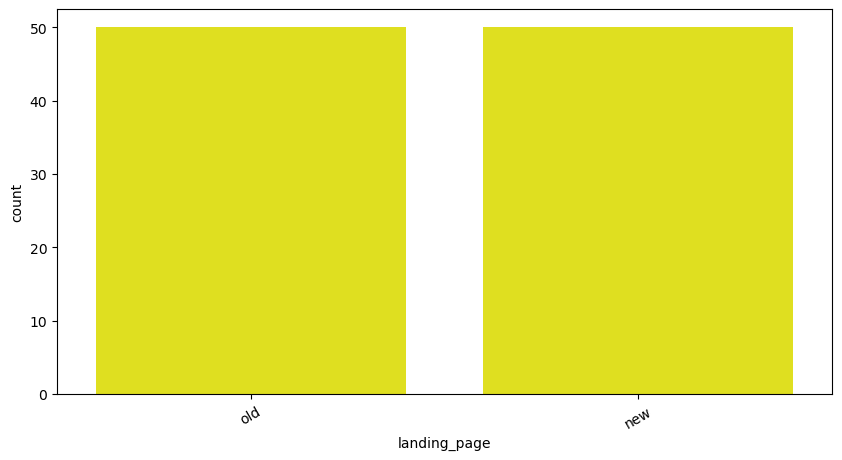

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='landing_page', color='yellow')
plt.xticks(rotation=30)

### Time spent on the page 

In [46]:
df['time_spent_on_the_page'].nunique()

94

* Usage of .nunique() to understand the diversity of the data. In this column I can evidence 94 unique values for the time spent on the page per minutes.

In [48]:
df['time_spent_on_the_page'].value_counts().head(10)

time_spent_on_the_page
6.04    2
4.75    2
7.16    2
3.88    2
5.86    2
0.40    2
3.48    1
5.08    1
5.42    1
2.23    1
Name: count, dtype: int64

* Here we can evidence the duplicates in time spent on the page which are 6.04, 4.75, 7.16, 3.88, 5.86, 0.40, however, rest of the values are unique in the dataset of 100 rows. 

### Inf values 

In [51]:
# Identify inf values
print(df['time_spent_on_the_page'].isin([np.inf, -np.inf]))

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: time_spent_on_the_page, Length: 100, dtype: bool


* There are no infinite values. 

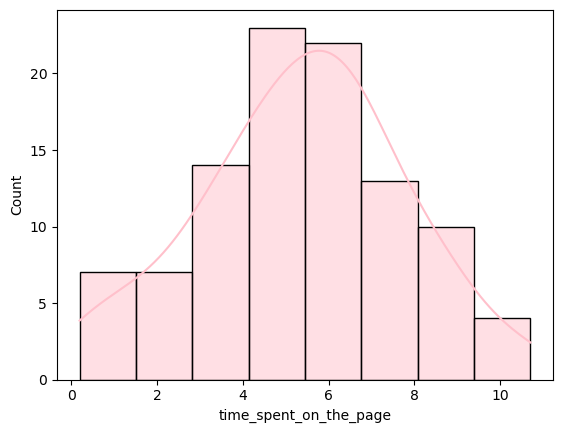

In [53]:
sns.histplot(data=df, x='time_spent_on_the_page', kde=True, color='Pink')
plt.show()

* The graph shows a peak around 6, indicating that most of the users spent around 6 minutes on the page. 
* A small group spent from 0-2 minutes or from 8-10 minutes, indicanting that these durations are less common. 
* The data doesn't show a normal distribution but a bit skewed left distribution with data concentrated between 4-6 minutes.

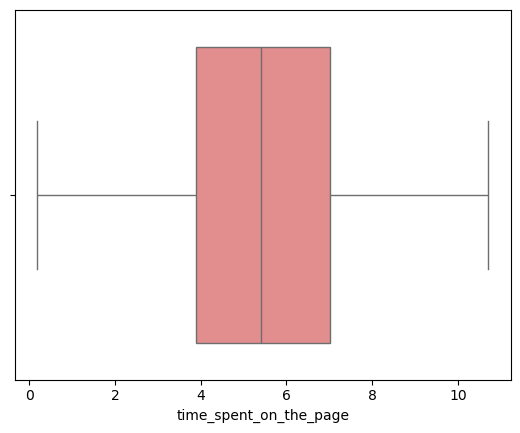

In [55]:
sns.boxplot(data=df, x='time_spent_on_the_page', color= 'lightcoral')
plt.show()

* The median is a bit closer to Q1 indicating a slight left skewed distribution. 
* Most of the data point are concentrated from 4 to 7 minutes. 
* The whiskers indicate the range of values from 0 to 10 minutes. 

### Converted 

In [58]:
df['converted'].nunique()

2

* Usage of .nunique() to understand the diversity of the data. In this column I can evidence 2 unique values for converted.

In [60]:
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

* There are 54 yes and 46 no. 54 converted users and 46 users that did not convert.

([0, 1], [Text(0, 0, 'no'), Text(1, 0, 'yes')])

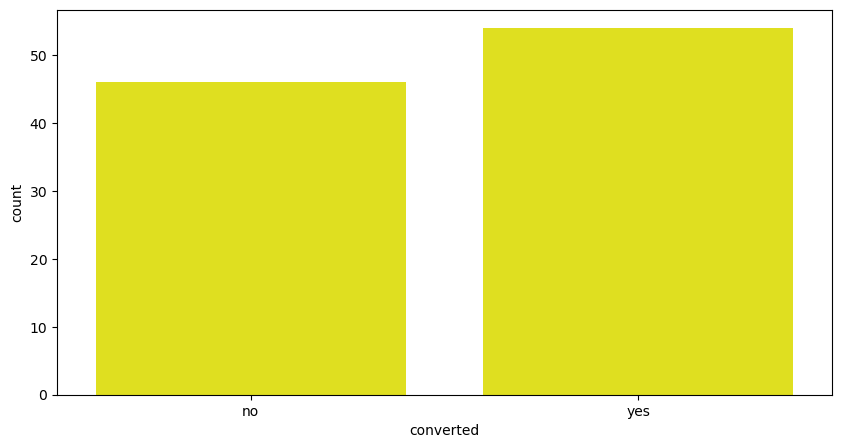

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='converted', color='yellow')
plt.xticks(rotation=0)

### Language preferred

In [64]:
df['language_preferred'].nunique()

3

* There are 3 unique languages: English, spanish and french. 

In [66]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

* There are 34 users that prefer spanish, 34 that prefer french and the remaining 32 that prefer english. 

([0, 1, 2],
 [Text(0, 0, 'Spanish'), Text(1, 0, 'English'), Text(2, 0, 'French')])

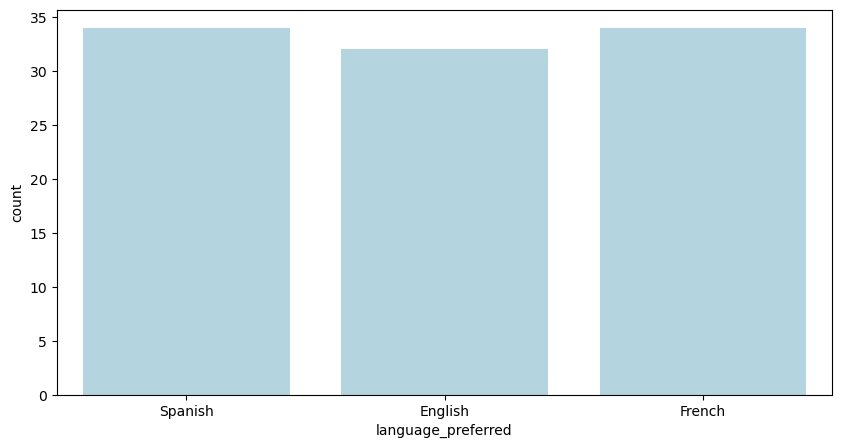

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='language_preferred', color='lightblue')
plt.xticks(rotation=0)

### Bivariate Analysis

### Landing page vs time spent 

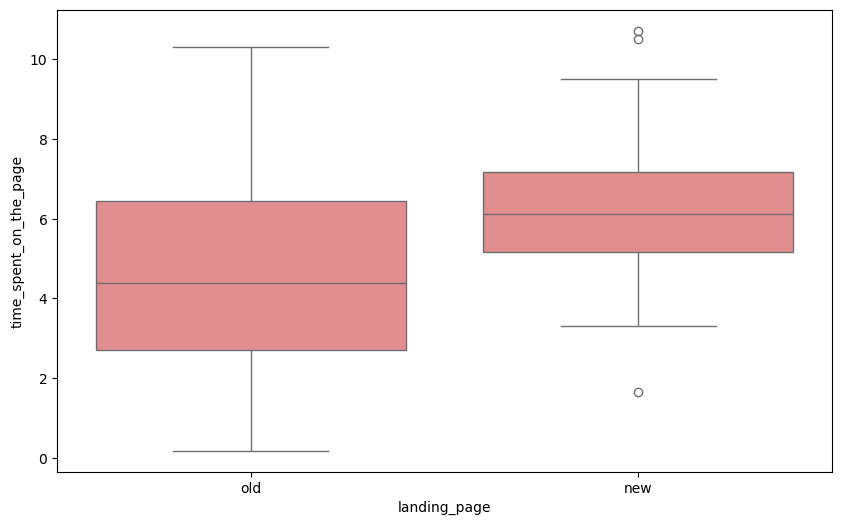

In [71]:
# To compare the distribution of time spent on old and new landing pages 
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', color= 'lightcoral')
plt.show()

* Old landing page median time spent is around 4 minutes. 
* The IQR varies from 3 to 6 minutes.
* For the old landing page there are no visible outliers.
* New landing page median time spent is close to 7 minutes.
* The IQR varies from aprox 5 to 7 minutes.


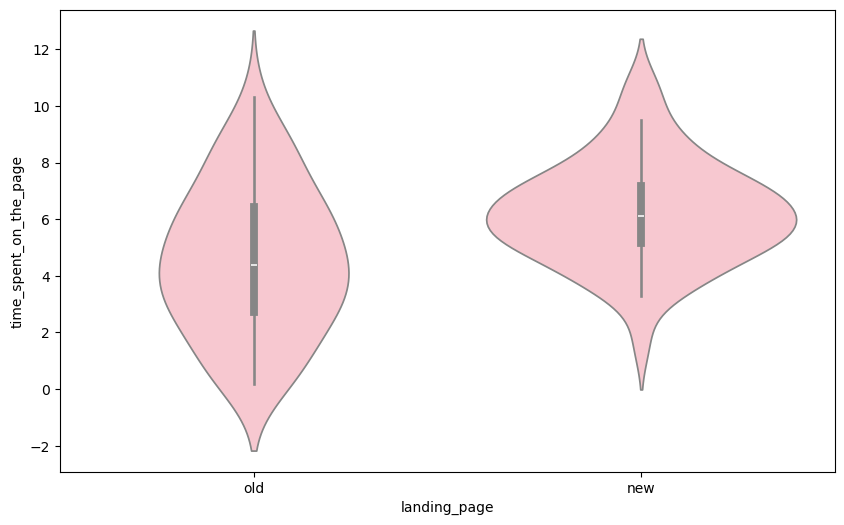

In [73]:
# To compare the density of time spent on different landing pages 
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='landing_page',y='time_spent_on_the_page', color= 'pink')
plt.show()

* The shape of the violin corresponding to the old page shows that the range vary from -2 to around 12. Most data seems to cluster between 3 to 6. It has a narrower shape, however, the violin for the new page is wider and exhibit a greater clustering from 5 to 8 minutes, indicating a significant change in user behavior. It can suggests that the new landing page has a significant impact in the time spent on the page.

### Converted vs time spent 

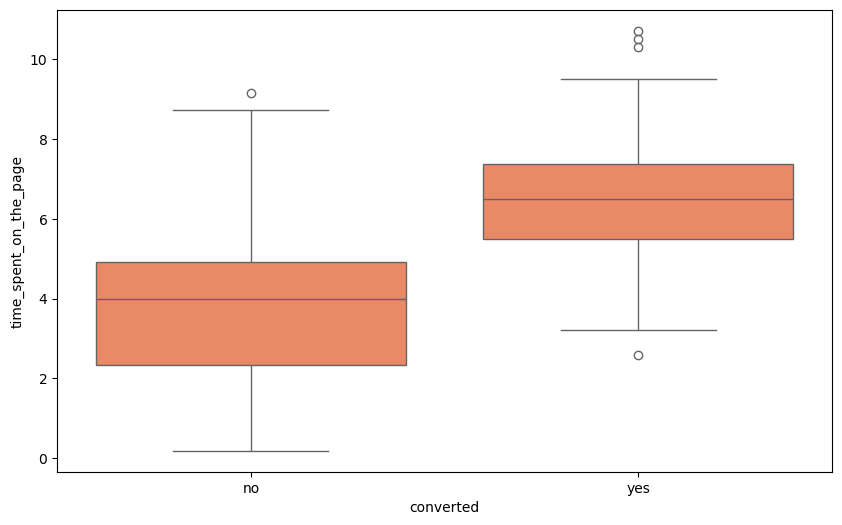

In [76]:
# To compare the distribution of time spent for converted and non converted 
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page', color= 'coral')
plt.show()

* The median time spent on the page is higher for the users who converted ( approx 6.5)  that for the users who did not convert (around 4 min).
* Users who converted have narrower IQR, indicating more consistency, less variability in the time spent.
* No and yes groups have outliers however no group has a higher outlier indicating that some users spent more time without converting, but it is atypical.
* Converted users tend to spend more time on the page suggeting to be more engaged. On the other hand IQR of non converted users suggests that some people spend very little time and it can indicate lack of interest. 
                                             

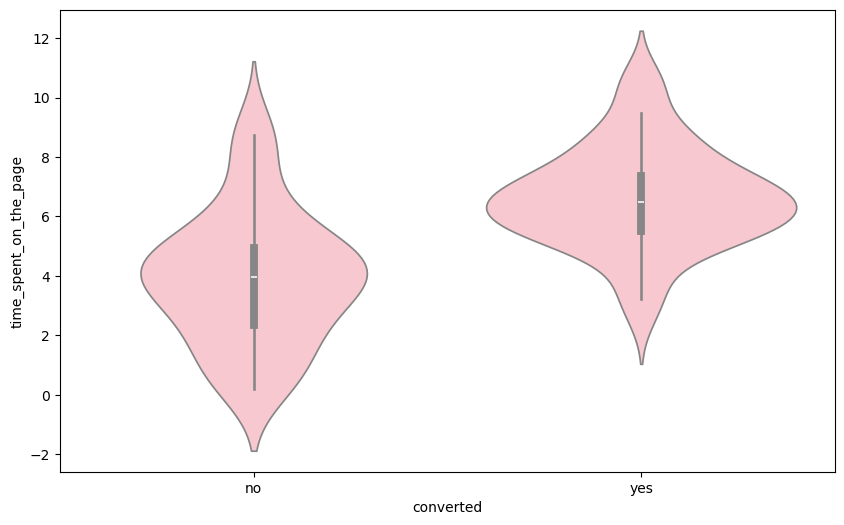

In [78]:
# To compare the density of time spent for converted and non converted
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='converted',y='time_spent_on_the_page', color= 'pink')
plt.show()

* The violin "no" shows that users who did not convert tend to spend a less amount of time on the page and most data is around 3 to 5. The distribution is narrower compared to the converted group.
  
* The right violin indicates that users who converted spend significantly more time on the page with a median above 6 and a broader range, suggesting higher engagement levels.

* The comparison of these two violin plots shows that users who converted spend more time on the page than those who did not. 

### Language preferred vs time spent 

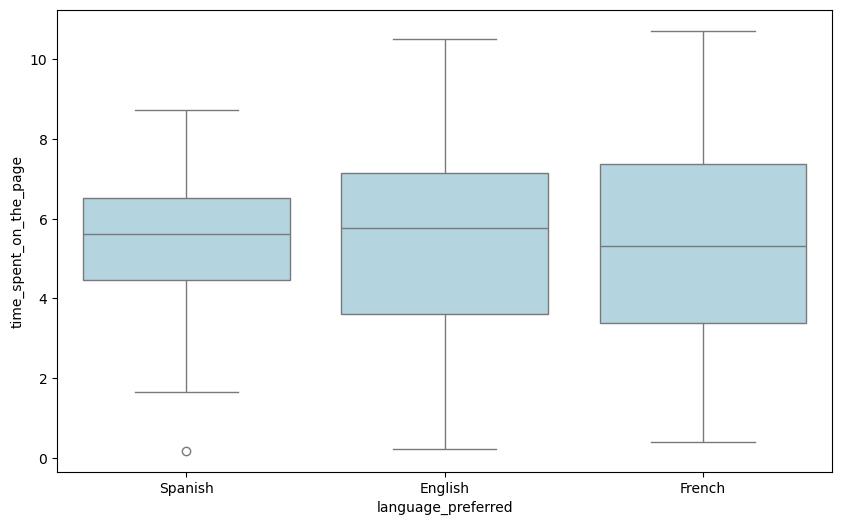

In [81]:
# To compared the distriibution in the time spent for different languages preferred 
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page', color= 'lightblue')
plt.show()

* Spanish users have the narrowest IQR, indicating less variability. Followed by english users and finally french users.
* Spanish users show one outlier, evidencing that at least one person spent significantly less time, almost 0 minutes. There's an atypical value.
* French has the largest IQR, indicating more variability, as well as English users which have similar range.
* All three languages preferences has similar median values. 

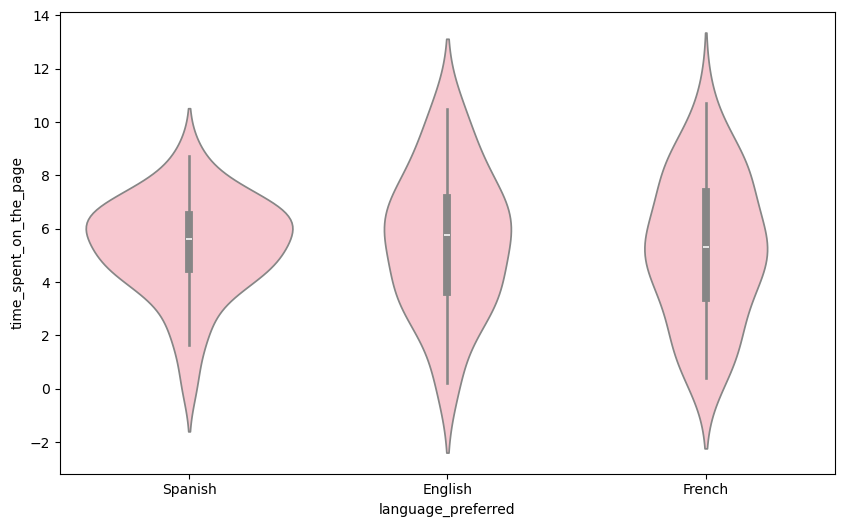

In [83]:
# To compare the density of time spent for language preference
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='language_preferred',y='time_spent_on_the_page', color= 'pink')
plt.show()

* The violin plot for Spanish-speaking users is wider, which means that we have a higher data density in that area, specifically, more observations in the range of 5 to 6 minutes. However, the violin plot for French and English-speaking users is more elongated, indicating that the data is mostly distributed over a broader range, suggesting greater variability or dispersion in the data

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

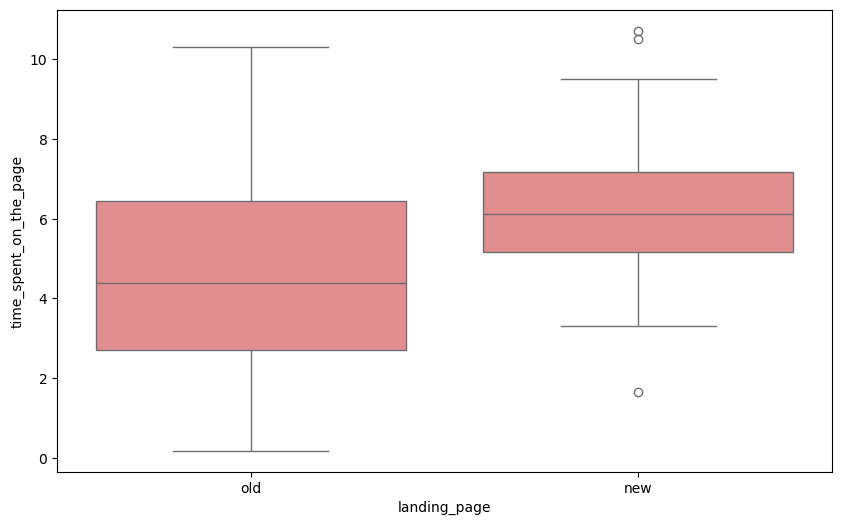

In [87]:
# To compare the distribution of time spent on old and new landing pages 
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', color= 'lightcoral')
plt.show()

### Step 1: Define the null and alternate hypotheses

I'm gonna test the null hypothesis

* $H_0:\mu_N=\mu_O$. The mean time spent on the new landing page is equal to the mean time spent on the old landing page

against the alternate hypothesis

* $H_a:\mu_N>\mu_O$. The mean time spent on the new landing is greater than the mean time spent on the old landing page.

### Step 2: Select Appropriate test

* Two sample t-test. To compare the means of two independent groups.

### Step 3: Decide the significance level

* I'm gonna use the significance level given in the problem statement. 
* $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [95]:
# Separate the data for each landing page 
#OLD
old_page_time_spent = df[df['landing_page'] == 'old']['time_spent_on_the_page']
print(old_page_time_spent)

0      3.48
3      3.02
5      5.28
7      6.53
9      2.08
10     6.21
11     2.58
14     8.72
17     0.40
18    10.30
19     3.88
20     2.66
21     7.03
27     4.05
29     4.28
31     3.52
32     5.39
33     4.52
34     4.46
35     8.50
36     3.13
37     6.04
39     0.19
40     8.46
41     1.92
45     8.02
50     0.22
53     4.71
55     0.93
56     1.81
58     7.40
59     9.15
62     4.18
63     5.47
64     5.96
66     6.60
67     4.75
69     2.23
70     0.40
74     4.87
75     6.57
76     1.44
79     3.21
83     2.90
84     4.30
85     0.91
89     6.04
92     8.35
94     3.05
96     6.52
Name: time_spent_on_the_page, dtype: float64


In [96]:
# Separate the data for each landing page 
# NEW
new_page_time_spent = df[df['landing_page'] == 'new']['time_spent_on_the_page']
print(new_page_time_spent)

1      7.13
2      4.40
4      4.75
6      5.25
8     10.71
12     5.86
13     6.03
15     6.27
16     8.73
22     3.65
23     7.02
24     6.18
25     4.39
26     9.49
28     7.81
30     5.41
38     1.65
42     7.16
43     7.16
44     3.91
46     5.37
47     7.23
48     8.08
49    10.50
51     5.65
52     6.47
54     6.41
57     8.30
60     6.01
61     6.79
65     7.27
68     6.70
71     5.42
72     5.08
73     7.46
77     3.88
78     9.12
80     4.68
81     5.26
82     5.74
86     6.71
87     3.68
88     3.30
90     5.40
91     8.47
93     4.94
95     5.15
97     7.07
98     6.20
99     5.86
Name: time_spent_on_the_page, dtype: float64


In [97]:
print('The sample standard deviation of the time spent on the old page is:', round(old_page_time_spent.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(new_page_time_spent.std(),2))

The sample standard deviation of the time spent on the old page is: 2.58
The sample standard deviation of the time spent on the new page is: 1.82


* Since the standard deviation is unequal, I'm gonna choose alternative = 'greater'

### Step 5: Calculate the p-value

In [100]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_page_time_spent, old_page_time_spent, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.00013923812251665497


### Step 6: Compare the p-value with $\alpha$

In [102]:
# Compare p-value with alpha
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis because the p-value is less than the level of significance: "+ 
    "Users spend more time on the new landing page than on the existing landing page.")
else:
    print("Fail to reject the null hypothesis because the p-value is greater than the level of significance: " +  
    "There is no significant difference in the time spent on the new and existing landing pages.")

Reject the null hypothesis because the p-value is less than the level of significance: Users spend more time on the new landing page than on the existing landing page.


### Step 7:  Inference

* Addressing to the query to get to know if users spend more time on the new landing page than the existing landing page, I chose to compare the mean time spent on the new landing page against the mean time spent on the old landing page.
  
*  The null hypothesis formulated indicates that the mean time spent on the new landing page is EQUAL to the mean time spent on the old landing page. Meanwhile, the alternate hypothesis suggests that the mean time spent on the new landing page is greater than the mean time spent on the old landing page.
  
*  A two-sample t-test was done since the purpose was to compare the means of two independent groups. The p-value found was 0.000139, which is considerably lower than the significance level of 5% (0.05). So, the null hypothesis is rejected.
  
*  Since we rejected the null hypothesis, it indicates that users spend more time on the new landing page compared to the old landing page. The mean time spent is not equal as the null hypothesis suggested.
  
*  It may indicate that the new design of the landing page was successful in terms of user engagement.
  
*  The visual analysis confirms this conclusion, since visually it is evident that the median time spent on the new landing page is greater than on the old landing age. Also, the IQR is narrower, suggesting more consistency on user experience.
  
*  We can conclude that the new landing page has a positive impact on user behavior. 


## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

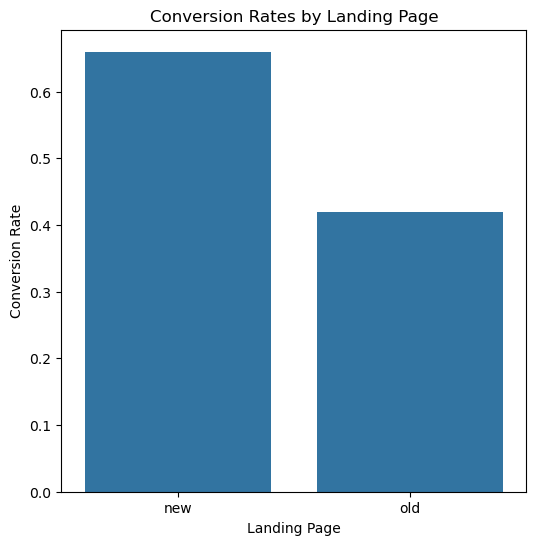

In [107]:
# Convert 'yes'/'no' to binary values with lambda function 
df['converted'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

# Calculate conversion rates
conversion_rates = df.groupby('landing_page')['converted'].mean().reset_index()
# Plot the conversion rates
plt.figure(figsize=(6, 6))
sns.barplot(x='landing_page', y='converted', data=conversion_rates)
plt.title('Conversion Rates by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Conversion Rate')
plt.show()

### Step 1: Define the null and alternate hypotheses

I'm gonna test the null hypothesis

* $H_0:\mu_N=\mu_O$. The conversion rate for the new landing page is equal to the conversion rate for the old landing page

against the alternate hypothesis

* $H_a:\mu_N>\mu_O$. The conversion rate for the new landing is greater than the conversion rate for the old landing page.

### Step 2: Select Appropriate test

* A two sample proportions z-test is a good fit for comparing the conversion rates between two independent groups. 

### Step 3: Decide the significance level

* I'm gonna use the significance level given in the problem statement. 
* $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [115]:
# Separate the data for each landing page
old_landing_page = df[df['landing_page'] == 'old']
new_landing_page = df[df['landing_page'] == 'new']

### Step 5: Calculate the p-value

In [117]:
from statsmodels.stats.proportion import proportions_ztest

# Number of conversions
old_conversions = old_landing_page['converted'].sum()
new_conversions = new_landing_page['converted'].sum()

# Number of total observations
number_old = old_landing_page.shape[0]
number_new = new_landing_page.shape[0]

# Perform the z-test
count = [new_conversions, old_conversions]
nobs = [number_new, number_old]
stat, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f'P-value: {p_value}')

P-value: 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [119]:
# Compare p-value with alpha
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis because the p-value is less than the level of significance: "+ 
    "The conversion rate for the new page is greater than the conversion rate for the old page")
else:
    print("Fail to reject the null hypothesis because the p-value is greater than the level of significance: " +  
    "There is not enough evidence to conclude that the conversion rate for the new page is greater than the conversion rate for the old page")

Reject the null hypothesis because the p-value is less than the level of significance: The conversion rate for the new page is greater than the conversion rate for the old page


### Step 7:  Inference


* Since the query aimes to determine if the conversion rate (the proportion of users who visit the landing page and successfully convert) for the new landing page is greater than that of the old landing page. The null hypothesis formulated indicates  that the conversion rate for the new landing page is EQUAL to the conversion rate for the old landing page and the alternate hypothesis suggests that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.
  
* A two-sample proportions z-test  was done since it is a good fit for this case and the p-value obtained was 0.008026, which is less than the significance level 0.05. So, the null hypothesis is rejected.
  
* The rejection of the null hypothesis indicates that there's strong statistical evidence that the conversion rate for the new landing page is greater than that for the old landing page, it is not equal as it was stated.
  
* This can lead to the conclusion that the changes done to the new page have had a positive impact in user conversion rates.
  
* In the bar chart, we can evidence visually that the conversion rate for the new landing page (the blue bar approx 0.7) is higher than for the old landing page (the orange bar approx 0.4).
  
* In conclusion, the new landing page has impact positively in enhacing user conversions rates. New design leads to a higher conversion rates.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

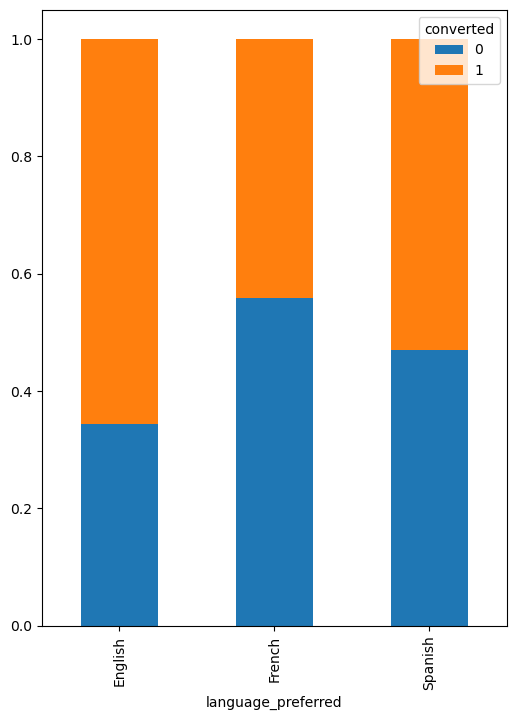

In [124]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.show()

### Step 1: Define the null and alternate hypotheses

* Null Hypothesis ($H_0\$): Conversion status is independent of preferred language.

* Alternative Hypothesis ($H_a\$): Conversion status is related to preferred language.

### Step 2: Select Appropriate test

* Use the chi-square test of independence to determine if there is a significant association between conversion status and preferred language.


### Step 3: Decide the significance level

* I'm gonna use the significance level given in the problem statement. 
* $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [132]:
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,0,1
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [134]:
# Convert 'yes'/'no' to binary values with lambda function 
df['converted_new'] = df['converted'].apply(lambda x: 1 if x == 'yes' else 0)

# Create a crosstab of conversion status and preferred language
conversion_language_crosstab = pd.crosstab(df['converted_new'], df['language_preferred'])

In [135]:
from scipy.stats import chi2_contingency

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(conversion_language_crosstab)
print('The p-value: is', p_value)

The p-value: is 1.0


### Step 6: Compare the p-value with $\alpha$

In [137]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis because the p-value is less than the level of significance: Conversion status and preferred language are related.")
else:
    print("Fail to reject the null hypothesis because the p-value is greater than the level of significance: Conversion status and preferred language are independent.")
    

Fail to reject the null hypothesis because the p-value is greater than the level of significance: Conversion status and preferred language are independent.


### Step 7:  Inference

* Addressing to the query whether there is a relationship between conversion status(whether users converted or not) and their preferred language, the null hypothesis formulated suggested that the conversion status is independent of preferred language.
  
* Chi square test of independence was done to assess if there's any relationship between conversion status and preferred language. The p-value found was 1.0.
  
* This value is greater than alpha of 0.05, leading to the conclusion to fail to reject the null hypothesis, indicating that there is no significant evidence to suggest that conversion status and preferred language are related.
  
* The contigency table provides good information to evidence that the proportions of users converting and not converting are too similar for the different language preferences.
  
* User conversion rates do not significantly change based on the language.
  
* The data suggests that the conversion status and preferred language are independent, implying that other factors can have a greater impact in conversion rates. 

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [142]:
new_page = df[df['landing_page'] == 'new']

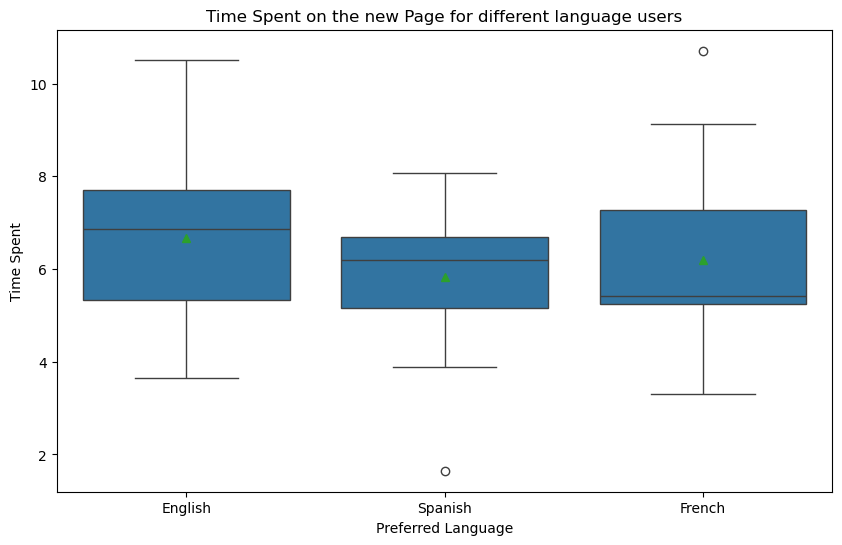

In [143]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', showmeans = True, data=new_page)
plt.title('Time Spent on the new Page for different language users')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent')
plt.show()

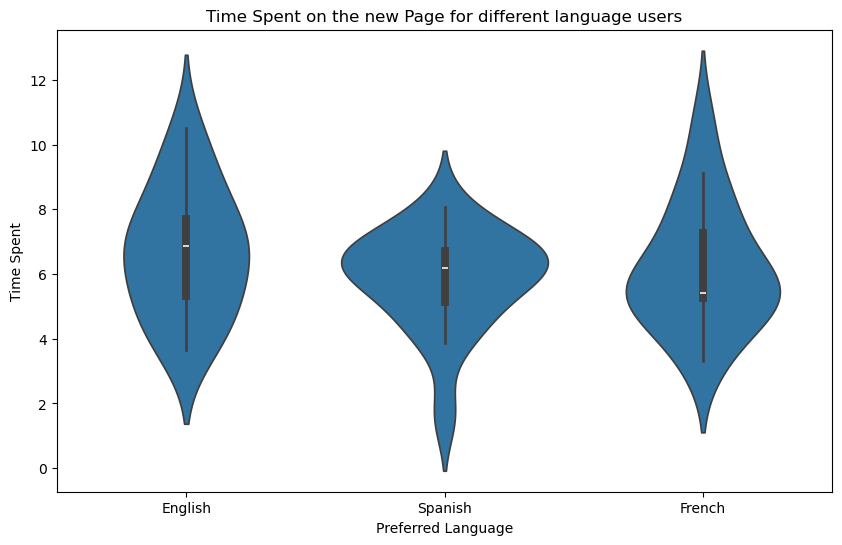

In [144]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='language_preferred', y='time_spent_on_the_page', data=new_page)
plt.title('Time Spent on the new Page for different language users')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent')
plt.show()

### Step 1: Define the null and alternate hypotheses

* Null Hypothesis ($H_0\$): The mean time spent on the new page is the same for all language users.

* Alternative Hypothesis ($H_a\$): The mean time spent on the new page is different for at least one language group.

### Step 2: Select Appropriate test

* One-way ANOVA test to compare the means of time spent on the new page across 3 different languages: English, Spanish, French.

### Step 3: Decide the significance level

* I'm gonna use the significance level given in the problem statement. 
* $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [217]:
english_time_new_page = new_page[new_page['language_preferred'] == 'English']['time_spent_on_the_page']
spanish_time_new_page = new_page[new_page['language_preferred'] == 'Spanish']['time_spent_on_the_page']
french_time_new_page = new_page[new_page['language_preferred'] == 'French']['time_spent_on_the_page']


### Step 5: Calculate the p-value

In [220]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(english_time_new_page, spanish_time_new_page, french_time_new_page)

print('The P-value is: ', p_value)

The P-value is:  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [223]:
# Significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis because the p-value is less than the level of significance. The mean time spent on the new page is different for at least one language.")
else:
    print("Fail to reject the null hypothesis because the p-value is greater than the level of significance. The mean time spent on the new page is the same for all languages.")

Fail to reject the null hypothesis because the p-value is greater than the level of significance. The mean time spent on the new page is the same for all languages.


### Step 7:  Inference

* Addresing to the query to determine if the time spent on the new page is same for the different languages users: English, Spanish, and French. The null hypothesis stated suggested that the mean time spent on the new page is the same for all language users and the alternative hypothesis indicates that the mean time spent on the new page is different for at least one language group.
  
* It was performed one-way ANOVA test to compare the means of time spent on the new page across the three language groups: english, spanish and french, with a significance level set at 0.05.
  
* The analysis resulted in a value of 0.432041 and since this p-value is greater than alpha of 0.05 leads to the conclusion to fail to reject the null hypothesis meaning that failing to reject the null hypothesis indicates that there is no significant difference in the mean time spent on the new page among the different language users.
  
* The mean time spent on the new page is quite similar across English, Spanish, and French users. The mean time spent is consistent for different laguage users. The language preference doesn't have a strong impact or it doesn't affect significantly user engagement with the new landing page.
  
* The visual analysis also supports this conclusion because shows that the means of the time spent are quire similar across the three language groups ( triangle indicators) and it also has similar IQR ranges. 


## Conclusion and Business Recommendations

1. Based on that the users spend more time on the new landing page compared to the old landing page, it is crucial to mantain the new design and to keep innovating in the future, continously improving its content and functionality. Old designs may cause the user to have less engagement with the content and consequently begin to visit the e-news portal less.
   
2. The new design led to a higher conversion rates, the new landing page had a positive impact in enhacing user conversion rates. This may be because new and modern designs tend to make the user feel more attracted to the content and consequently the user will want to subscribe to continue consuming the content.
   
3. The new design of the landing page has proven effectiveness in time spent and conversion rates.  
   
5. Since the time spent on the page correlates to higher conversion rates, it is suggested to have interactive elements such as short videos, related content suggestions, interaction in forums and comments, surveys, and even live chats and live streams to keep users on the e news portal longer.
   
6. Even though user conversion rates do not significantly change based on the language. It can be important to consider creating customized content for English, Spanish and French users because there is a significant cultural difference depending on the language, users may have different preferences. This can lead to improve user experience and in long term increase conversion rates for each language group.
   
7. It is suggested to consistently monitor conversion rates among users of different languages and analyze regularly performance metrics to detect patterns and implement conscious changes. As well as implement testing for the variation of the content on the new landing page to identigy which changes result to the best engament and conversion results.
   
8. A good approach could be audience segmentation: dividing the audience according to language preferences for customize email marketing and user experiences.

___